<a href="https://colab.research.google.com/github/slealamanda/Detec-o_de_c-ncer_de_mama_com_ML/blob/main/Detec%C3%A7%C3%A3o_cancer_de_mama_e_prostata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1>**Utilizando Machine Learning para detecção de câncer de mama e próstata**

Esse estudo de caso é baseado em um feito pelo professor **Carlos Melo**, do blog *Sigmoidal*. 

Acesse [aqui](https://sigmoidal.ai/machine-learning-para-a-deteccao-de-cancer-de-mama/) a publicação original.

O estudo utilizado como base foi feito com o intuito de abordar sobre o Outubro Rosa, que é uma campanha feita para homenagear as vítimas e conscientizar a todos sobre o Câncer de Mama.

Tendo isso em mente, resolvi estender para o mês de Novembro, que é conhecido como Novembro Azul pela campanha de conscientização sobre o Câncer de Próstata.

A minha intenção é fazer um comparativo de ambas doenças que continuam atingindo muitas mulheres e homens. Dessa forma, 



# Importação dos dados

*   Os dados sobre o Câncer de Mama foram retirados do [Repositório de Machine 
Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic), e se encontram nesse [link](https://uc4f1b4f85a8e52e8d2a917a970c.dl.dropboxusercontent.com/cd/0/inline/BAqqSu9AbonC6aRAryuK5gyDIIDVoPMdsvwyAzPdp-CzpMFziUANUs-6jCXc-tt79YJLPY4nUsQyRcEYpkAODFFx6_k8szFPWASZHzaUxO9wnm9wAM-eamccA337EZhT9vQ/file#).

*   Os dados sobre o Câncer de Próstata foram retirados do [Kaggle](https://www.kaggle.com/), e se encontram nesse [link](https://www.kaggle.com/alihantabak/prostate-cancer-predictions-with-ml-and-dl-methods)




In [181]:
#importar os pacotes

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

#configurar o notebook
sns.set_style()

A variável que irá armazenar os dados sobre o câncer de mama será chamada de "df_1", e a que irá armazenar os dados sobre o câncer de próstata será a "df_2".

As análises serão feitas uma seguida da outra, por isso a importância de variáveis que diferenciem os dataframes.

In [182]:
#importação dos datasets
breast = "https://www.dropbox.com/s/z8nw6pfumdw3bb9/breast-cancer-wisconsin.csv?raw=1"
df_1 = pd.read_csv(breast)

prostate = "/content/drive/My Drive/Colab_Datasets/prostate_cancer/Prostate_Cancer.csv"
df_2 = pd.read_csv(prostate)


# Análise exploratória

Vamos conhecer as variáveis que estão dispostas em ambos os dataframes:

*   ID
*   Diagnosis 
*   Radius 
*   Texture 
*   Perimeter
*   Area
*   Smoothness 
*   Compactness 
*   Concavity 
*   Concave points
*   Symmetry
*   Fractal dimension

As principais a serem consideradas são *ID*, que representa o número de identificação, e *Diagnosis*, que é a variável alvo, podendo ser M = Maligno e B = Benigno.

In [183]:
#ter conhecimento sobre a dimensão do DataFrame

print("Dimensões do DataFrame Câncer de Mama: ")
print("Linhas:\t\t{}".format(df_1.shape[0]))
print("Colunas:\t{}".format(df_1.shape[1]))


DIMENSÕES DO DATAFRAME:
Linhas:		569
Colunas:	33


In [184]:
print("Dimensões do DataFrame Câncer de Próstata:")
print("Linhas:\t\t{}".format(df_2.shape[0]))
print("Colunas:\t{}".format(df_2.shape[1]))

DIMENSÕES DO DATAFRAME:
Linhas:		100
Colunas:	10


Com isso, podemos perceber que o Dataset sobre o Câncer de Mama possui uma quantidade maior de dados, contando com 569 linhas e 33 colunas, do que o do Câncer de Prostata, que contém 100 linhas e 10 colunas. 

In [185]:
# ver as 5 primeiras entradas
df_1.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [186]:
df_2.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [189]:
#ver as 5 últimas saídas 
df_1.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [190]:
df_2.tail()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066
99,100,M,16,27,94,643,0.098,0.114,0.188,0.064


In [187]:
# resumo estatistico das variáveis numéricas
df_1.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [188]:
df_2.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [191]:
#ver as colunas dos datasets
df_1.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [192]:
df_2.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

Conforme visto anteriormente, como o dataset do Câncer de Mama possui mais dados, optei por reduzi-lo a quantidade do dataset do Câncer de Próstata. 

Isso me ajudará a comparar as informações que serão extraídas. 

In [193]:
df_1.drop(['concavity_mean', 'concave points_mean', 'radius_se', 'texture_se', 
           'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 
           'concavity_se', 'concave points_se', 'symmetry_se',
            'fractal_dimension_se', 'radius_worst', 'texture_worst',
            'perimeter_worst', 'area_worst', 'smoothness_worst',
            'compactness_worst', 'concavity_worst', 'concave points_worst',
            'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'], 
       axis = 1, inplace = True)

df_1.drop(df_1.tail(469).index, inplace = True)

In [194]:
# verificar existencia de valores ausentes
df_1.isnull().sum()

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [195]:
df_2.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

Diagnósticos Cancer de Mama: 
M    0.65
B    0.35
Name: diagnosis, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


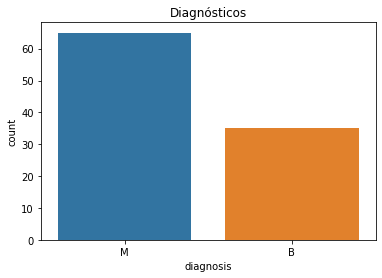

In [196]:
# ver porcentagem dos diagnosticos
print("Diagnósticos Cancer de Mama: ");
print(df_1.diagnosis.value_counts()/df_1.shape[0]);

#plotar o grafico com os diagnosticos
fig, ax = plt.subplots();
sns.countplot('diagnosis', data = df_1, ax = ax);
ax.set_title("Diagnósticos");
plt.show();

Diagnósticos Cancer de Prostata: 
M    0.62
B    0.38
Name: diagnosis_result, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


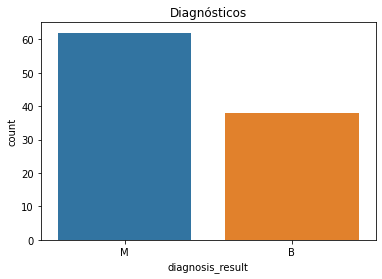

In [197]:
# ver porcentagem dos diagnosticos
print("Diagnósticos Cancer de Prostata: ")
print(df_2.diagnosis_result.value_counts()/df_2.shape[0])

#plotar o grafico com os diagnosticos
fig, ax = plt.subplots()
sns.countplot('diagnosis_result', data = df_2, ax = ax)
ax.set_title("Diagnósticos")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


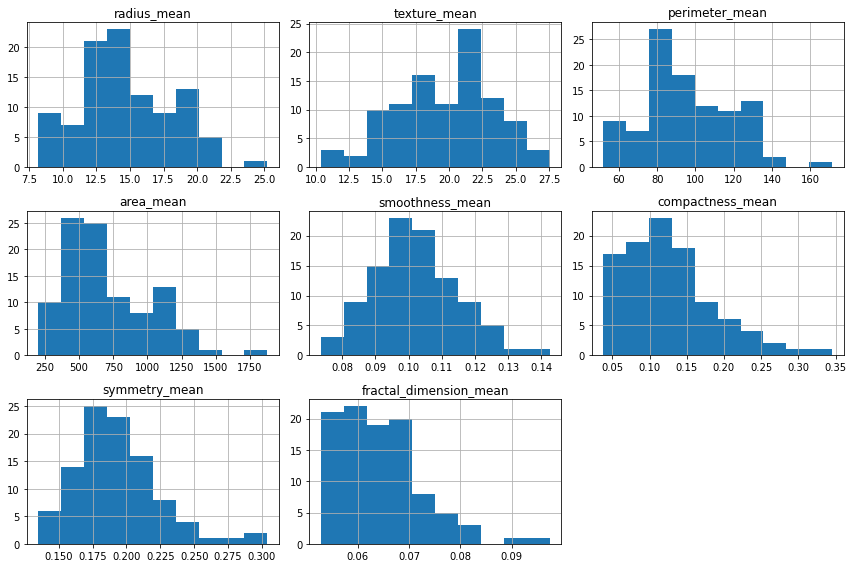

In [198]:
# plotar o histograma das features para ter uma noção de como as variáveis estão distribuídas
fix, ax = plt.subplots(figsize=(12,8))
df_1.drop('id', axis=1).hist(ax=ax)
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


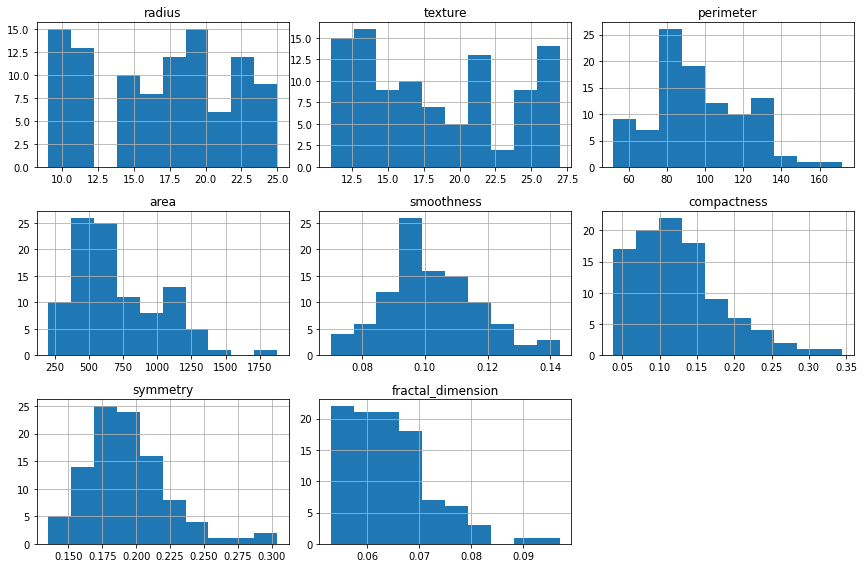

In [199]:
# plotar o histograma das features para ter uma noção de como as variáveis estão distribuídas
fix, ax = plt.subplots(figsize=(12,8))
df_2.drop('id', axis=1).hist(ax=ax)
plt.tight_layout()

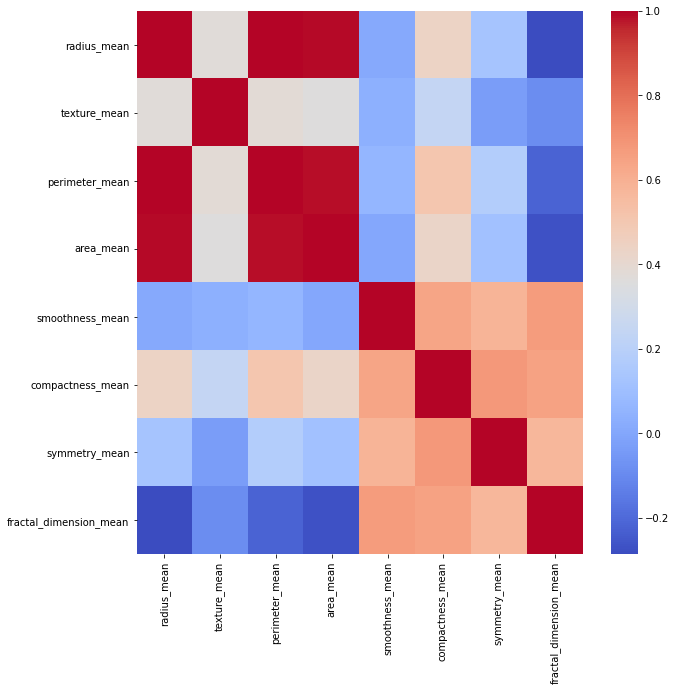

In [200]:
# plotar heatmap para ver a correlação entre as variáveis
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_1.drop('id', axis=1).corr(), cmap='coolwarm', ax=ax)
plt.show()

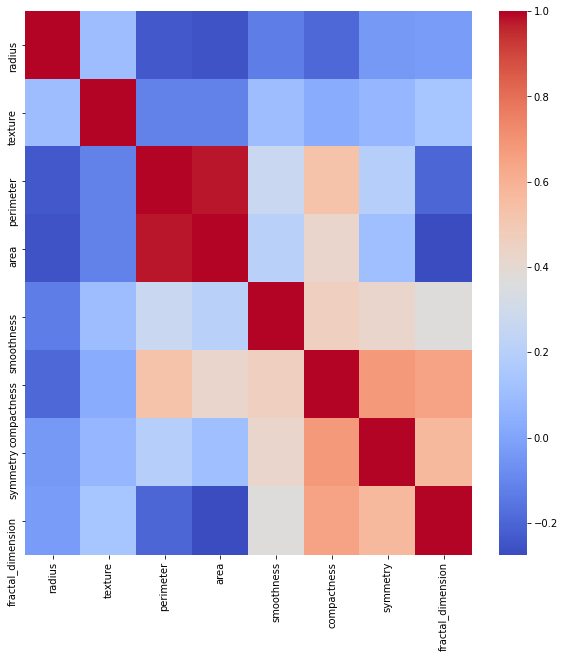

In [201]:
# plotar heatmap para ver a correlação entre as variáveis
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_2.drop('id', axis=1).corr(), cmap='coolwarm', ax=ax)
plt.show()

# Preparação dos dados 

Para converter a variável alvo que é categórica, será usado o `LabelEncoder`, afim de alimentar o modelo adequadamente. 

In [202]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# separar as variáveis independentes da variável alvo
X_1 = df_1.drop(['diagnosis', 'id'], axis = 1)
y_1 = df_1['diagnosis']

# padronizar as colunas numéricas
X_1 = StandardScaler().fit_transform(X_1)

# label encoder na variável alvo
y_1 = LabelEncoder().fit_transform(y_1)

# dividir o dataset entre treino e teste
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.3)


In [203]:
# separar as variáveis independentes da variável alvo
X_2 = df_2.drop(['diagnosis_result', 'id'], axis = 1)
y_2 = df_2['diagnosis_result']

# padronizar as colunas numéricas
X_2 = StandardScaler().fit_transform(X_2)

# label encoder na variável alvo
y_2 = LabelEncoder().fit_transform(y_2)

# dividir o dataset entre treino e teste
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.3)

O cálculo utilizado pelo `StandardScaler` considera a média das amostras do conjunto de treino e o desvio padrão da amostra.

Antes de construir o modelo, o dataset foi dividido entre treino e teste, utilizando a função `train_test_split`.






# Modelo de Machine Learning



In [204]:
from sklearn.ensemble import RandomForestClassifier

#instanciando o modelo de Random Forest
ml_model_1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', 
                                  random_state = 42)
#treinando o modelo
ml_model_1.fit(X_train_1, y_train_1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [205]:
#instanciando o modelo de Random Forest
ml_model_2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', 
                                  random_state = 42)
#treinando o modelo
ml_model_2.fit(X_train_2, y_train_2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [206]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#realizar as previsões no dataset de teste
y_pred_1 = ml_model_1.predict(X_test_1)

#ver acurácia geral
print('[Acurácia] Random Forest:', accuracy_score(y_test_1, y_pred_1))

#imprimir o classification report
print('\n[Classification Report] Random Forest')
print( classification_report(y_test_1, y_pred_1) )

[Acurácia] Random Forest: 0.9

[Classification Report] Random Forest
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.94      0.88      0.91        17

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [207]:
#realizar as previsões no dataset de teste
y_pred_2 = ml_model_2.predict(X_test_2)

#ver acurácia geral
print('[Acurácia] Random Forest:', accuracy_score(y_test_2, y_pred_2))

#imprimir o classification report
print('\n[Classification Report] Random Forest')
print( classification_report(y_test_2, y_pred_2) )

[Acurácia] Random Forest: 0.8666666666666667

[Classification Report] Random Forest
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.95      0.86      0.90        21

    accuracy                           0.87        30
   macro avg       0.84      0.87      0.85        30
weighted avg       0.88      0.87      0.87        30



In [208]:
#plotar a matriz de confusão
pd.DataFrame(confusion_matrix(y_test_1, y_pred_1),
             index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])

,pred_neg,pred_pos
neg,12,1
pos,2,15


In [209]:
#plotar a matriz de confusão
pd.DataFrame(confusion_matrix(y_test_2, y_pred_2),
             index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])

,pred_neg,pred_pos
neg,8,1
pos,3,18
